In [16]:
# evaluate RFE for classification
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model= DecisionTreeClassifier() # the model shouldn't necessary the same with rfe's model
pipeline = Pipeline(steps=[('s', rfe),('m', model)]) # 's' and 'm' is just a chosen letters you can use any letter
# evaluate model
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores=cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)'% (np.mean(n_scores), np.std(n_scores)))


Accuracy: 0.888 (0.031)


In [17]:
# make a prediction with an RFE pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model= DecisionTreeClassifier() # the model shouldn't necessary the same with rfe's model
pipeline = Pipeline(steps=[('s', rfe),('m', model)]) # 's' and 'm' is just a chosen letters you can use any letter
# fit the model on all available data
pipeline.fit(X,y)
# make a prediction for one example
data = [[2.56999479, 0.13019997, 3.16075093, -435936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 1.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


In [18]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y= make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [27]:
# evaluate RFE for regression
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y= make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model= DecisionTreeRegressor() # the model shouldn't necessary the same with rfe's model
pipeline = Pipeline(steps=[('s', rfe),('m', model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring= 'neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# reporting MAE of the model across all the folds, the sklearn library make the MAE negative so it maximize
# instead of minimizing. This means the negative MAE values closer to zero are better and the perefect MAE is zero. 
# report performance
print('MAE: %.3f (%.3f)'% (np.mean(n_scores), np.std(n_scores)))

MAE: -27.075 (2.769)


In [25]:
# make a regression prediction with an RFE pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
#define dataset
X, y= make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model= DecisionTreeRegressor() # the model shouldn't necessary the same with rfe's model
pipeline = Pipeline(steps=[('s', rfe),('m', model)])
# fit the model on all available data
pipeline.fit(X,y)
# make a prediction for one example
data = [[-2.022220122, 0.31563495, 0.8279464, -0.30620401, 0.116003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat=pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


>2 0.712 (0.041)
>3 0.823 (0.036)
>4 0.873 (0.032)
>5 0.888 (0.036)
>6 0.892 (0.025)
>7 0.886 (0.030)
>8 0.885 (0.027)
>9 0.886 (0.026)


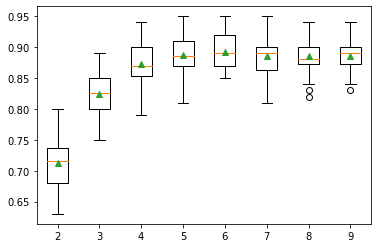

In [10]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X,y

# get a list of models to evaluate
def get_models():
    models=dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define datasets
X, y = get_dataset()

# get the model to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [3]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV  #-> for automation we should use 'REFCV' instead of 'REF'
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X,y
X, y = get_dataset()
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [('s', rfe), ('m', model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.884 (0.029)


In [4]:
# by using RFE we might be interested to know which feature get selected and which not
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
#Summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i])) 
    # .support_ reports True or False
    # .ranking_ reports the importance of each feature

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


>lr 0.890 (0.030)
>per 0.847 (0.038)
>cart 0.885 (0.035)
>rf 0.858 (0.031)
>gbm 0.889 (0.026)


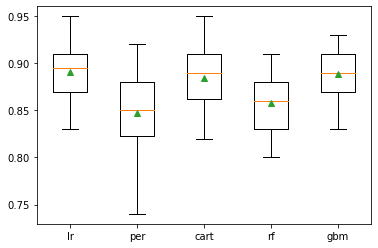

In [8]:
# explore the algorithm wrapped by RFE -> This will tell us which algorithm is better to be used in RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X,y

# get a list of models to evaluate
def get_models():
    models=dict()
    #lr
    rfe=RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr']= Pipeline(steps=[('s', rfe), ('m', model)])
    #perceptron
    rfe=RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per']= Pipeline(steps=[('s', rfe), ('m', model)])
    # cart
    rfe=RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart']= Pipeline(steps=[('s', rfe), ('m', model)])
    # rf
    rfe=RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf']= Pipeline(steps=[('s', rfe), ('m', model)])
    # gbm
    rfe=RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm']= Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define datasets
X, y = get_dataset()

# get the model to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
